# Titanic - Machine Learning from Disaster
#Classification Models Comparison

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # high level interface for drawing attractive and informative statistical graphics
from sklearn.model_selection import train_test_split # the train test_split_function is used to split datasets into training and testing sets for machine learning model training and evaluation.
from sklearn.metrics import accuracy_score,  classification_report, confusion_matrix
# accuracy_score : Measures the percentage of correctly predicted values.
# classification_report() : print(classification_report(Y_test, Y_pred))
# Gives Precision / Recall / F1-Score / Support
# confusion_matrix() Returns a 2x2 matrix (for binary classification) showing TP, TN, FP, and FN.





#Different ML Models
# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load training data
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TitanicProject-LogisticRegression/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# --- Data Cleaning ---

In [ ]:
train_df.isna().sum() #Missing Data

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Drop 'Cabin' due to too many missing values
df= train_df.drop(columns='Cabin',axis=1)


In [ ]:
# Fill missing 'Age' with mean
df.fillna({'Age': df['Age'].mean()}, inplace=True)
# Fill missing 'Embarked' with mode
df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)

# --- Feature Engineering ---

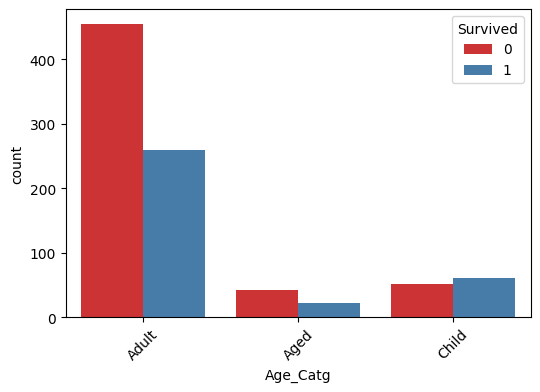

In [ ]:
# Create age category feature
def catg_Age(age):
  if age < 18:
    return 'Child'
  if age > 50:
    return 'Aged'
  else:
    return 'Adult'
df['Age_Catg'] = df['Age'].apply(catg_Age)

# Visualize survival by age category
plt.figure(figsize=(6,4))
sns.countplot(x='Age_Catg', hue='Survived',data=df, palette='Set1', dodge=True)
plt.xticks(rotation=45)
plt.show()

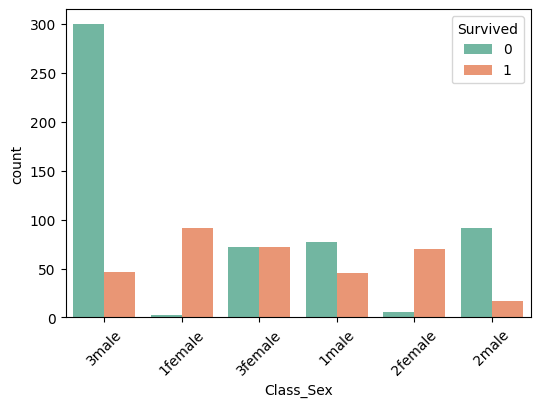

In [ ]:
# Combine Pclass and Sex
df['Pclass']= df['Pclass'].astype(str)
df['Class_Sex'] = df['Pclass'] + '' + df['Sex']

# Visualize survival by class and sex
plt.figure(figsize=(6,4))
sns.countplot(x='Class_Sex', hue='Survived',data=df,palette='Set2',dodge=True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Encode categorical variables
df.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True) #Encoding Categorical Variables:

<ipython-input-61-a7048cf6117a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True) #Encoding Categorical Variables:


# --- Feature Selection ---

In [ ]:
df['Pclass'] = df['Pclass'].astype(int)  #  to int
X= df.drop(columns=['PassengerId','Survived','Name','Ticket','Age_Catg','Class_Sex']) #These remaining columns are the features that I will use for training a machine learning model.
Y= df['Survived'] #Target Label


# --- Train-Test Split ---

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
# 20% of the data will be used for testing, and the remaining 80% will be used for training.
print(X.shape,X_train.shape, X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(891, 7) (712, 7) (179, 7)
(891,) (712,) (179,)


# --- Train & Compare Models ---

In [ ]:
def train_and_evaluate_model(model, X_train, X_test, Y_train, Y_test, model_name="Model"):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(Y_test, y_pred)
    print(f"📌 {model_name} Accuracy: {acc:.4f}")
    print(f"📋 Classification Report:\n{classification_report(Y_test, y_pred)}")
    print(f"🔄 Confusion Matrix:\n{confusion_matrix(Y_test, y_pred)}\n")

    return model_name, acc



In [ ]:
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC(probability=True)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("MLP (Neural Net)", MLPClassifier(max_iter=1000)),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

results = []
for name, model in models:
    model_name, acc = train_and_evaluate_model(model, X_train, X_test, Y_train, Y_test, model_name=name)
    results.append((model_name, acc))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)


📌 Logistic Regression Accuracy: 0.7821
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179

🔄 Confusion Matrix:
[[91  9]
 [30 49]]

📌 KNN Accuracy: 0.6760
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       100
           1       0.68      0.49      0.57        79

    accuracy                           0.68       179
   macro avg       0.68      0.66      0.66       179
weighted avg       0.68      0.68      0.67       179

🔄 Confusion Matrix:
[[82 18]
 [40 39]]

📌 SVM Accuracy: 0.6369
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.95      0.75       1

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:45:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# --- Predict on Test Data ---

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TitanicProject-LogisticRegression/test.csv')

In [ ]:
# Clean test data
test_df.drop(columns='Cabin', inplace=True)
test_df.fillna({'Age': test_df['Age'].mean()}, inplace=True)
test_df.fillna({'Fare': test_df['Fare'].mean()}, inplace=True)
test_df.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True) #Encoding Categorical Variables

<ipython-input-98-2ac573416d50>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True) #Encoding Categorical Variables


In [ ]:
# Feature selection for test data
X_final_test = test_df.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1)
predictions = model.predict(X_final_test)


<ipython-input-100-06e4d1b8555a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=submission_df, palette='tab10')


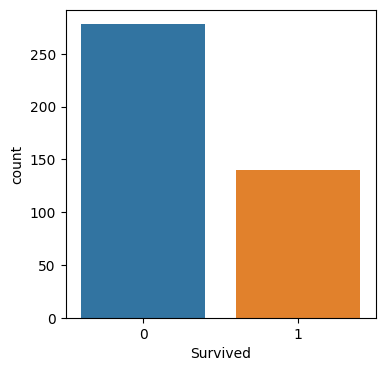

In [ ]:
# Create submission DataFrame
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'],'Survived': predictions})

# Visualize prediction result
plt.figure(figsize=(4,4))
sns.countplot(x='Survived', data=submission_df, palette='tab10')
plt.show()


In [ ]:
# Export to CSV
submission_df.to_csv('submission.csv', index=False)